In [14]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler

In [15]:
df = pd.read_csv('data/churn.csv')

In [16]:
df.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [18]:
df.state.value_counts(normalize=True)

WV    0.031803
MN    0.025203
NY    0.024902
AL    0.024002
OR    0.023402
WI    0.023402
OH    0.023402
WY    0.023102
VA    0.023102
CT    0.022202
MI    0.021902
VT    0.021902
ID    0.021902
TX    0.021602
UT    0.021602
IN    0.021302
KS    0.021002
MD    0.021002
NJ    0.020402
NC    0.020402
MT    0.020402
CO    0.019802
NV    0.019802
WA    0.019802
RI    0.019502
MA    0.019502
MS    0.019502
AZ    0.019202
FL    0.018902
MO    0.018902
ME    0.018602
NM    0.018602
ND    0.018602
DE    0.018302
OK    0.018302
NE    0.018302
SD    0.018002
SC    0.018002
KY    0.017702
IL    0.017402
NH    0.016802
AR    0.016502
DC    0.016202
GA    0.016202
HI    0.015902
TN    0.015902
AK    0.015602
LA    0.015302
PA    0.013501
IA    0.013201
CA    0.010201
Name: state, dtype: float64

In [19]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [20]:
df.columns = df.columns.str.replace(' ','_')

In [21]:
df.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

In [22]:
df.area_code.unique()

array([415, 408, 510])

In [23]:
# Dropping 'state' (51 unique values) since 'area_code' (3 unique values) still gives location data with much less noise
# Dropping 'number_vmail_messages' to reduce noise since the binary value in 'voice_mail_plan' should suffice
# Dropping international minutes, calls, and charges to reduce noise since the binary value in 'international_plan' should suffice
# Dropping 'phone_number' because there are 3333 unique values and should have no affect on predicting churn
df.drop(['state', 'phone_number', 'number_vmail_messages', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge'], axis=1, inplace=True)

In [24]:
df.columns

Index(['account_length', 'area_code', 'international_plan', 'voice_mail_plan',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


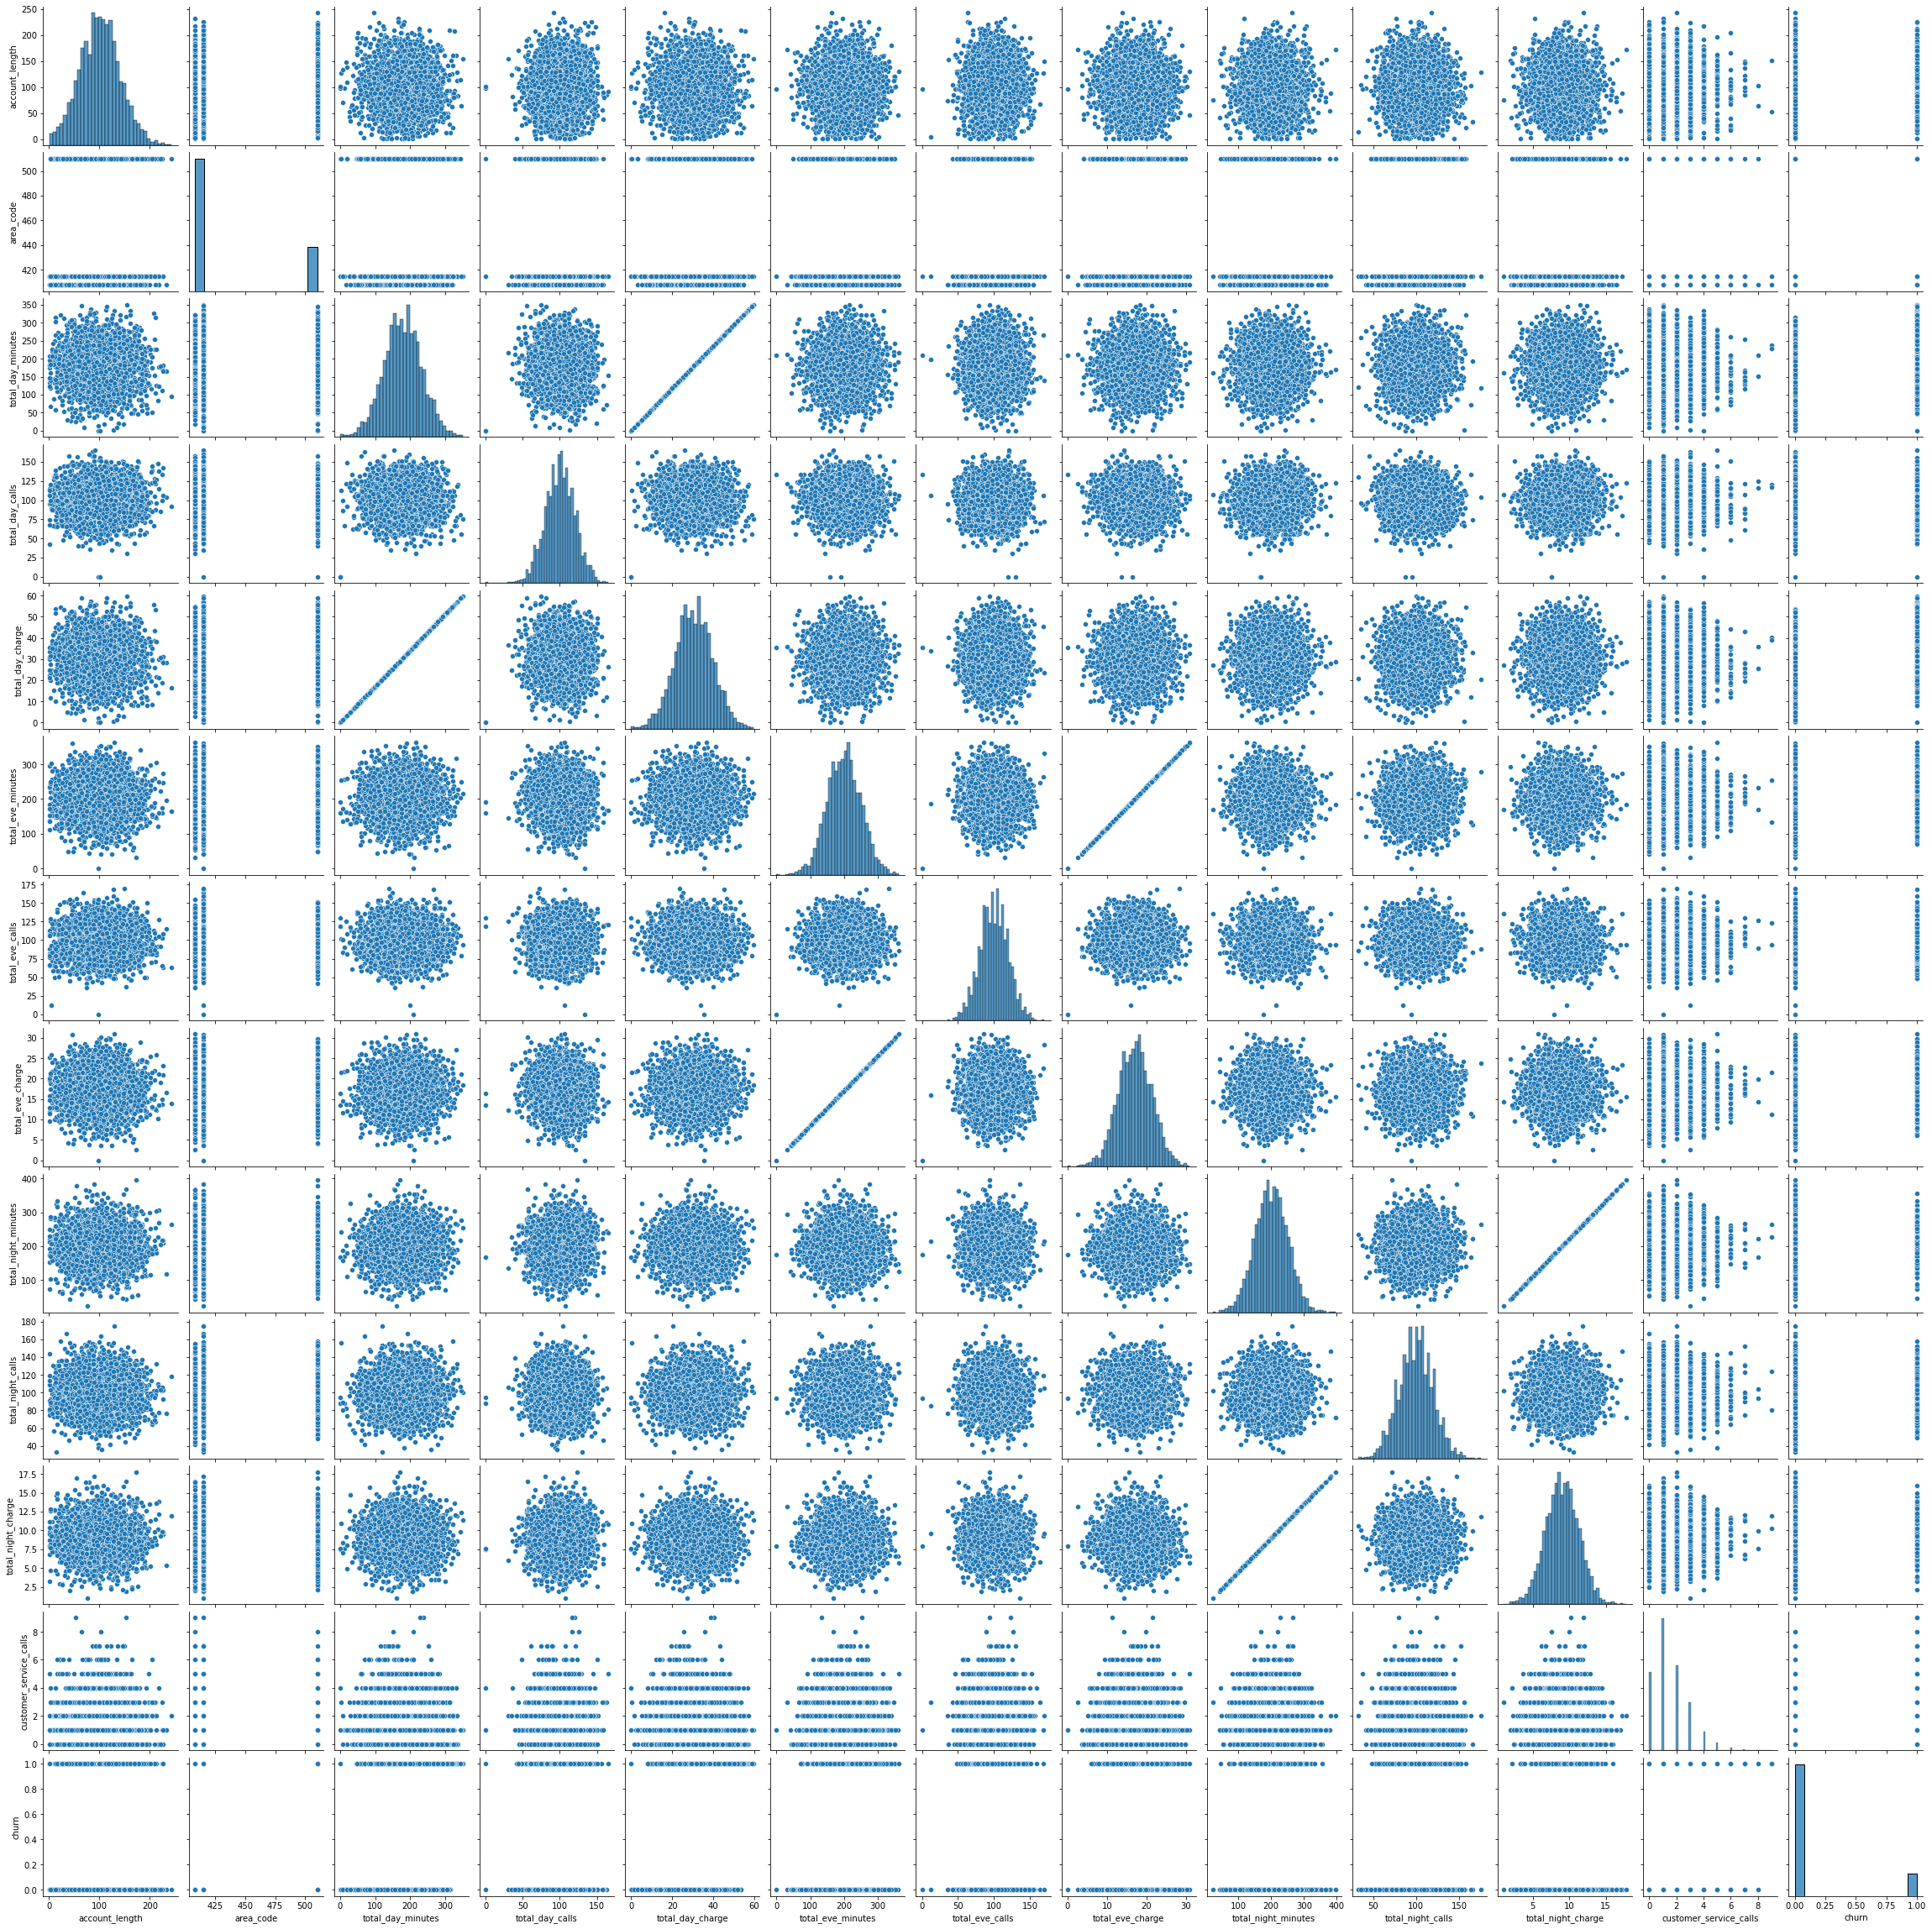

In [25]:
sns.pairplot(df)

In [26]:
# Dropping charges columns because of multicollinearity
df.drop(['total_day_charge','total_eve_charge', 'total_night_charge'], axis=1, inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   area_code               3333 non-null   int64  
 2   international_plan      3333 non-null   object 
 3   voice_mail_plan         3333 non-null   object 
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_eve_minutes       3333 non-null   float64
 7   total_eve_calls         3333 non-null   int64  
 8   total_night_minutes     3333 non-null   float64
 9   total_night_calls       3333 non-null   int64  
 10  customer_service_calls  3333 non-null   int64  
 11  churn                   3333 non-null   bool   
dtypes: bool(1), float64(3), int64(6), object(2)
memory usage: 289.8+ KB


In [28]:
df.describe()

,account_length,area_code,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,1.562856
std,39.822106,42.371290,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000
25%,74.000000,408.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,1.000000
50%,101.000000,415.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,1.000000
75%,127.000000,510.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,2.000000
max,243.000000,510.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,9.000000
